# Régression Multiple : Implémentation Pratique et Évaluation du Modèle

## Introduction
La **régression multiple** est une technique d'*apprentissage supervisé* permettant de modéliser la relation entre plusieurs variables indépendantes et une variable dépendante continue. Ce notebook a pour objectif de démontrer la mise en œuvre d'un modèle de régression multiple à l'aide de la descente de gradient. Nous utiliserons un jeu de données contenant plusieurs caractéristiques pour prédire une variable cible. Nous aborderons différentes étapes du processus, allant de la préparation des données à l'évaluation du modèle.

In [3]:
# Import du dataset, ainsi que des librairies matplotlib et mpl 3D, ainsi que numpy 
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Dataset

On commence par initialiser le dataset que l'on notera $M$, que l'on cooupe dans deux variables : ${ x }$ et ${ y }$ sont des matrices.

- $ {M} $ le dataset initial, contient les 2 colonnes de caractéristiques, ainsi que la colonne target (cible) à la fin, soit une matrice de taille $(100 \times 3)$

$$
M = \left[
\begin{array}{ccc}
x_1^{(1)} & x_2^{(1)} & y^{(1)} \\
x_1^{(2)} & x_2^{(2)} & y^{(2)} \\
\vdots & \vdots & \vdots \\
x_1^{(100)} & x_2^{(100)} & y^{(100)}
\end{array}
\right]
$$

- $ {x} $ contient 100 échantillons avec 2 caractéristiques (ou dimensions), soit une matrice de taille $(100 \times 2 )$ :

$$
x = \left[
\begin{array}{cc}
x_1^{(1)} & x_2^{(1)} \\
x_1^{(2)} & x_2^{(2)} \\
\vdots & \vdots \\
x_1^{(100)} & x_2^{(100)}
\end{array}
\right]
$$

- $ {y} $, la cible, est un vecteur de taille $( 100 \times 1 )$ correspondant aux valeurs cibles pour chaque échantillon.

$$
x = \left[
\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(100)}
\end{array}
\right]
$$

On crée ensuite le vecteur ${X}$ pour le modèle quadratique :

- ${ X }$ contient 100 échantillons pour $( (2 \times 2 + 1) )$, soit une matrice de taille $( 100 \times 5 )$, où chaque ligne contient les termes : ${ x_1^{(l)^2} }$, ${ x_1^{(l)} }$, ${ x_2^{(l)^2} }$, ${ x_2^{(l)} }$ et un biais ${ 1 }$ (pour le dernier terme de ${\theta}$ (contenant les coefficients de chaque terme) qui servira, donc, de constante au modèle).

La matrice ${ X }$ peut être représentée comme suit :


$$
X = \left[ 
\begin{array}{ccccc}
x_1^{(1)^2} & x_1^{(1)} & x_2^{(0)^2} & x_2^{(0)} & 1 \\
x_1^{(2)^2} & x_1^{(2)} & x_2^{(1)^2} & x_2^{(1)} & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
x_1^{(100)^2} & x_1^{(100)} & x_2^{(100)^2} & x_2^{(100)} & 1
\end{array}
\right]
$$

En bref, la matrice ${ X }$ est la matrice ${ x }$ à laquelle on ajoute des termes au carré, ainsi qu'une colonne de 1.

Pour finir, on initialise le vecteur $\theta$ qui contient, lui, tous les coefficients de tous les termes de la matrice X (utile quand on travaillera sur le modèle):

- ${\theta}$ est un vecteur de taille $(5 \times 1)$, chaque terme est un coefficient, le premier est le coefficient de $x_1^{(1)^2}$, le deuxième celui de $x_1^{(1)}$ et ainsi de suite... Le dernier quand à lui est une constante, ce terme est multiplié par le biais $1$.

$$
X = \left[ 
\begin{array}{c}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_{5}
\end{array}
\right]
$$

In [98]:
# Génération des données de régression (100 échantillons, 2 features)
x, y = make_regression(n_samples=100, n_features=2)

# Reshape de y pour le rendre un vecteur colonne (nécessaire pour la multiplication matricielle)
y = y.reshape(y.shape[0], 1)
y = (y**2)

# Construction de la matrice X avec les termes quadratiques et linéaires des features, ainsi qu'un terme constant (biais)
X = np.hstack((x**2, x, np.ones((y.shape[0], 1))))

# Initialisation aléatoire du vecteur des paramètres (theta)
theta = np.random.randn(X.shape[1], 1)

print(f'X={X[:10,:]}\n\n')
print(f'theta={theta[:10,:]}')

X=[[ 1.41043323e+00  4.51499940e-03  1.18761662e+00 -6.71937452e-02
   1.00000000e+00]
 [ 3.66708537e-01  1.25826551e+00  6.05564643e-01  1.12172435e+00
   1.00000000e+00]
 [ 7.03173381e-01  2.82359924e-01 -8.38554340e-01 -5.31375502e-01
   1.00000000e+00]
 [ 1.62587456e-01  1.22627768e-01 -4.03221348e-01  3.50182478e-01
   1.00000000e+00]
 [ 1.83273068e+00  2.89812283e+00 -1.35378384e+00  1.70238739e+00
   1.00000000e+00]
 [ 4.42255343e-01  1.01912984e-02 -6.65022814e-01 -1.00951961e-01
   1.00000000e+00]
 [ 4.55384010e-02  1.37095887e+00 -2.13397284e-01 -1.17087953e+00
   1.00000000e+00]
 [ 1.39488373e+00  6.44212732e+00  1.18105196e+00 -2.53813461e+00
   1.00000000e+00]
 [ 1.08313931e-01  1.66123675e+00 -3.29110819e-01 -1.28888974e+00
   1.00000000e+00]
 [ 7.82653136e-01  4.02700326e-02  8.84676854e-01 -2.00673946e-01
   1.00000000e+00]]


theta=[[ 0.91652181]
 [-1.11240191]
 [-1.79697359]
 [ 1.78443686]
 [ 0.46516759]]


In [85]:
# Vérification des dimensions des matrices/variables
print(f"Dimensions de x : {x.shape}")
print(f"Dimensions de y : {y.shape}")
print(f"Dimensions de X : {X.shape}")
print(f"Dimensions de theta : {theta.shape}")

Dimensions de x : (100, 2)
Dimensions de y : (100, 1)
Dimensions de X : (100, 5)
Dimensions de theta : (5, 1)


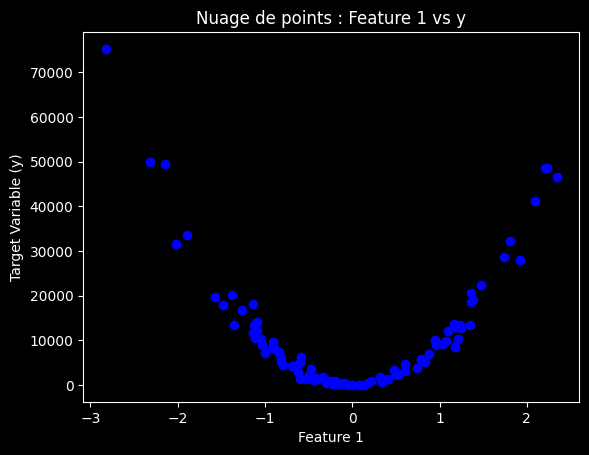

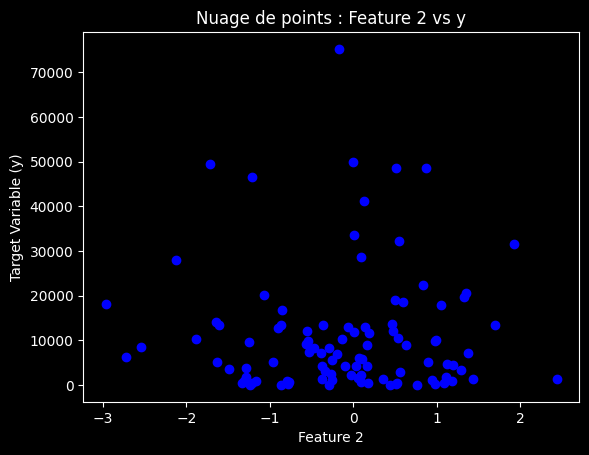

In [99]:
plt.style.use('dark_background')

# Visualisation des données : nuage de points entre la première feature et la cible y
plt.scatter(x[:, 0], y, c="blue")
plt.xlabel('Feature 1')
plt.ylabel('Target Variable (y)')
plt.title('Nuage de points : Feature 1 vs y')
plt.show()

# Visualisation des données : nuage de points entre la deuxième feature et la cible y
plt.scatter(x[:, 1], y, c='blue')
plt.xlabel('Feature 2')
plt.ylabel('Target Variable (y)')
plt.title('Nuage de points : Feature 2 vs y')
plt.show()

## 2. Model

Le modèle choisi est un modèle quadratique de la forme :

$$
f(x_1^{(i)}, x_2^{(i)}) = \theta_1 x_1^{(i)^2} + \theta_2 x_1^{(i)} + \theta_3 x_2^{(i)^2} + \theta_4 x_2^{(i)} + \theta_5
$$

Ce modèle permet de capturer des relations non linéaires entre les variables. Pour le représenter de manière plus compacte, nous pouvons l'écrire sous forme matricielle :

$$
F = X \cdot \theta
$$

Le vecteur de sortie \(F\) peut être écrit comme suit :

$$
F = \left[ 
\begin{array}{c}
f(x_1^{(1)}, x_2^{(1)}) \\
f(x_1^{(2)}, x_2^{(2)}) \\
\vdots \\
f(x_1^{(100)}, x_2^{(100)})
\end{array}
\right]
$$

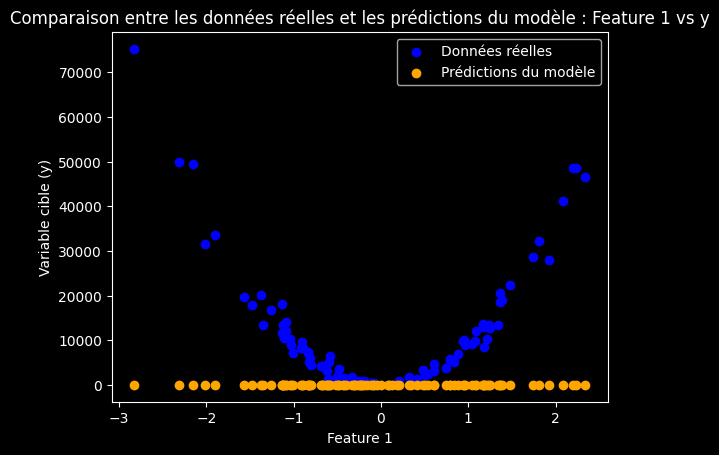

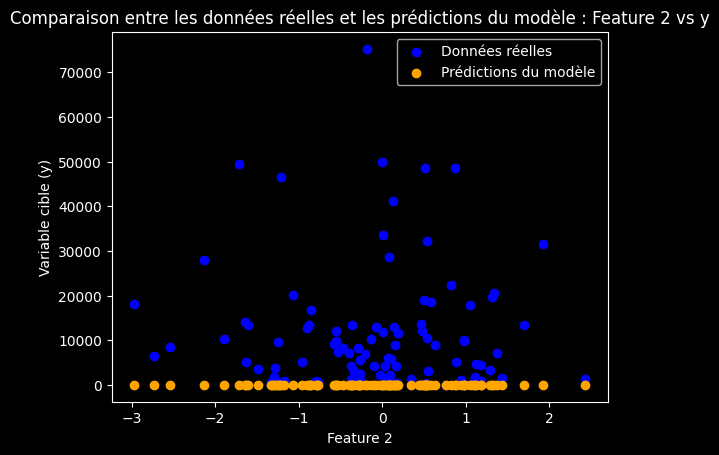

In [100]:
# Définition du modèle de régression : produit matriciel entre X et les paramètres theta
def model(X, theta):
    return X.dot(theta)

# Visualisation du modèle par rapport aux données : Feature 1 vs Target (y)
plt.scatter(x[:, 0], y, label='Données réelles', color='blue')  # Nuage de points pour les données réelles
plt.scatter(x[:, 0], model(X, theta), label='Prédictions du modèle', color='orange')  # Prédictions du modèle
plt.xlabel('Feature 1')  # Légende pour l'axe des x
plt.ylabel('Variable cible (y)')  # Légende pour l'axe des y
plt.title('Comparaison entre les données réelles et les prédictions du modèle : Feature 1 vs y')  # Titre du graphique
plt.legend()  # Affichage de la légende pour les courbes
plt.show()

# Visualisation du modèle par rapport aux données : Feature 2 vs Target (y)
plt.scatter(x[:, 1], y, label='Données réelles', color='blue')  # Nuage de points pour les données réelles
plt.scatter(x[:, 1], model(X, theta), label='Prédictions du modèle', color='orange')  # Prédictions du modèle
plt.xlabel('Feature 2')  # Légende pour l'axe des x
plt.ylabel('Variable cible (y)')  # Légende pour l'axe des y
plt.title('Comparaison entre les données réelles et les prédictions du modèle : Feature 2 vs y')  # Titre du graphique
plt.legend()  # Affichage de la légende pour les courbes
plt.show()


## 3. Cost Function

La fonction de coût utilisée ici s'appelle "Mean Squared Error" (MSE). Elle est définie par la formule suivante :

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(F - y \right)^2
$$

Où :
- $m$ est le nombre d'exemples dans l'ensemble de données.
- $ F $ est la prédiction du modèle pour l'exemple $ i$, donnée par les paramètres $ \theta $ et les caractéristiques $ X $.
- $ y $ est la matrice target représentant les valeurs réelles.
- Le terme $( F - y )^2$ représente l'erreur quadratique pour chaque exemple.
- Le facteur $ \frac{1}{2m} $ sert à normaliser la somme et à simplifier les calculs lors de l'optimisation (notamment la descente de gradient).

L'objectif est de minimiser cette fonction de coût en ajustant les paramètres $ \theta $ afin de réduire l'écart entre les prédictions et les valeurs réelles. 


In [101]:
def cost_function(X: np.ndarray, theta: np.ndarray, y: np.ndarray) -> float:
    """
    Calcule l'erreur du model entré par rapport aux valeurs réelles.
    
    Args:
        X (numpy.ndarray): Matrice des caractéristiques (n_samples, n_features)
        theta (numpy.ndarray): Vecteur des paramètres du modèle (n_features, 1)
        y (numpy.ndarray): Vecteur des valeurs cibles (n_samples, 1)
    
    Returns:
        float: La valeur de la fonction de coût (erreur quadratique moyenne)
    """
    m = y.shape[0] # Nombres d'exemples
    return (1/2*m) * np.sum((model(X, theta) - y)**2)

## 4. Gradient Descent

La **Descente de Gradient** est un algorithme d'optimisation utilisé pour minimiser une fonction de coût, comme $ J(\theta) $. L'objectif est de trouver les paramètres $ \theta $ qui minimisent cette fonction de coût, en ajustant les paramètres du modèle pour rendre les prédictions aussi proches que possible des valeurs réelles.

Pour minimiser l'erreur de notre fonction $ J(\theta) $, nous devons calculer la dérivée de cette fonction par rapport à chaque paramètre $ \theta_i $. La dérivée nous indique la pente de la fonction de coût à chaque point pour chaque paramètre $ \theta_i $, ce qui nous aide à savoir dans quelle direction et de combien ajuster chaque paramètre pour réduire l'erreur du modèle.

La dérivée de la fonction de coût est donnée par :

$$
\frac{\partial J}{\partial \theta} = \frac{1}{m} X^T \cdot (F - y)
$$

Où :
- $ X^T $ est la transposée de la matrice $ X $, contenant les caractéristiques des exemples.
- $ F $ est le vecteur des prédictions du modèle.
- $ y $ est le vecteur des valeurs réelles.
- $ m $ est le nombre d'échantillons.

Cette dérivée nous permet de calculer l'ajustement nécessaire pour chaque paramètre $ \theta_i $.

Une fois la dérivée calculée, nous mettons à jour les paramètres du modèle à chaque itération en suivant la direction de la pente négative. C'est-à-dire que nous ajustons les paramètres pour réduire l'erreur, en appliquant la formule suivante :

$$
\theta = \theta - \alpha \frac{\partial J}{\partial \theta}
$$

Où :
- $ \theta $ est le vecteur des paramètres du modèle.
- $ \alpha $ est le **pas d'apprentissage** (learning rate), un hyperparamètre qui détermine la taille des étapes à chaque itération.
- $ \frac{\partial J}{\partial \theta} $ est la dérivée calculée précédemment.

L'algorithme effectue ces mises à jour de manière itérative, en ajustant les paramètres à chaque étape. Le processus se répète jusqu'à ce que les paramètres convergent vers des valeurs qui minimisent la fonction de coût $ J(\theta) $. En d'autres termes, l'algorithme continue de mettre à jour les paramètres jusqu'à ce que la dérivée devienne proche de zéro, ce qui signifie que la fonction de coût a atteint un minimum.

L'algorithme peut être exécuté pendant un certain nombre d'itérations ou jusqu'à ce que les mises à jour deviennent suffisamment petites (c'est-à-dire que la fonction de coût ne change plus beaucoup).


In [102]:
def gradient(X, theta, y):
    """
    Calcule le gradient de la fonction de coût pour un modèle de régression linéaire.
    
    Args:
        X (numpy.ndarray): Matrice des caractéristiques (n_samples, n_features)
        theta (numpy.ndarray): Vecteur des paramètres du modèle (n_features, 1)
        y (numpy.ndarray): Vecteur des valeurs cibles (n_samples, 1)
    
    Returns:
        numpy.ndarray: Le gradient de la fonction de coût par rapport à theta
    """
    m = y.shape[0]
    return (1/m) * X.T.dot(model(X, theta) - y)

def gradient_descent(X, theta, y, iterations, learning_rate):
    """
    Applique la descente de gradient pour minimiser la fonction de coût.
    
    Args:
        X (numpy.ndarray): Matrice des caractéristiques (n_samples, n_features)
        theta (numpy.ndarray): Vecteur des paramètres initiaux du modèle (n_features, 1)
        y (numpy.ndarray): Vecteur des valeurs cibles (n_samples, 1)
        iterations (int): Nombre d'itérations pour la descente de gradient
        learning_rate (float): Taux d'apprentissage (learning rate)
    
    Returns:
        tuple: 
            - numpy.ndarray: Le vecteur des paramètres optimisés theta
            - numpy.ndarray: L'historique des valeurs de la fonction de coût au fil des itérations
    """
    cost_history = np.zeros((iterations, 1))
    for i in range(iterations):
        theta = theta - learning_rate * gradient(X, theta, y)
        cost_history[i] = cost_function(X, theta, y)
    return theta, cost_history

## 5. Phase D'Entraînement

In [103]:
final_theta, cost_history = gradient_descent(X, theta, y, 200, 0.01)

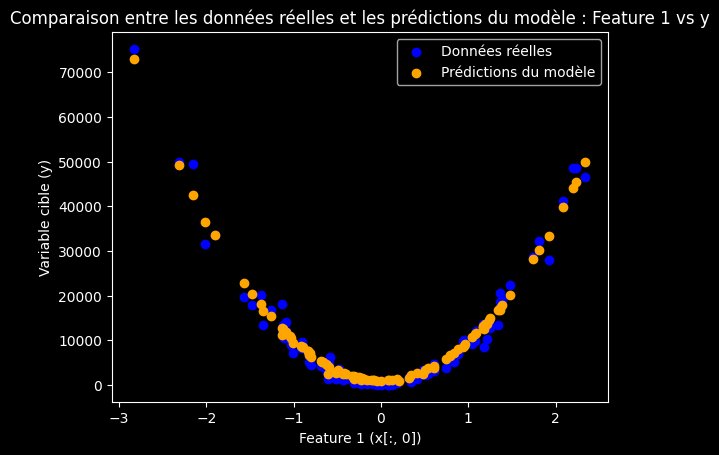

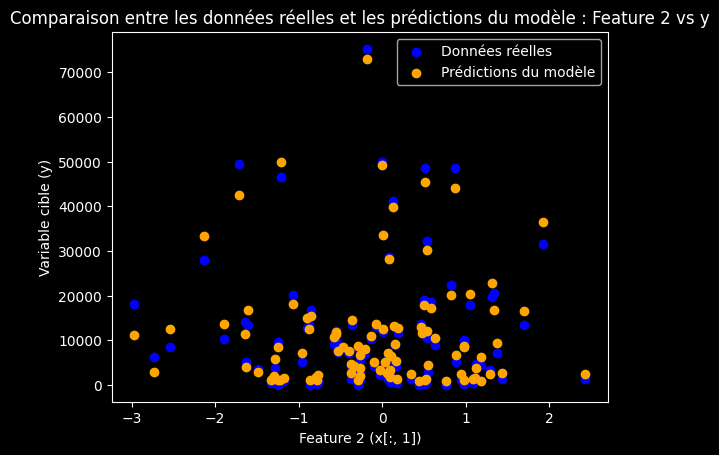

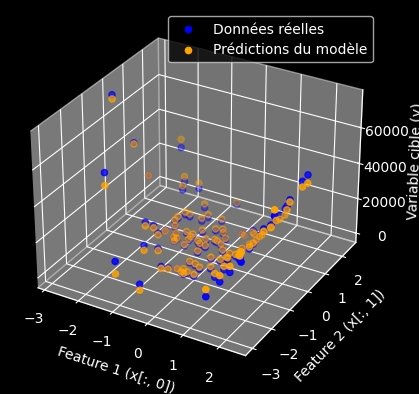

In [104]:
# Prédictions du modèle sur les données avec les paramètres optimisés (final_theta)
pred = model(X, final_theta)

# Visualisation 1 : Comparaison entre les données réelles et les prédictions pour la première feature
plt.scatter(x[:, 0], y, label='Données réelles', color='blue')  # Nuage de points pour les données réelles
plt.scatter(x[:, 0], pred, label='Prédictions du modèle', color='orange')  # Prédictions du modèle
plt.xlabel('Feature 1 (x[:, 0])')  # Légende pour l'axe des x
plt.ylabel('Variable cible (y)')  # Légende pour l'axe des y
plt.title('Comparaison entre les données réelles et les prédictions du modèle : Feature 1 vs y')  # Titre du graphique
plt.legend()  # Affichage de la légende pour distinguer les données réelles des prédictions
plt.show()

# Visualisation 2 : Comparaison entre les données réelles et les prédictions pour la deuxième feature
plt.scatter(x[:, 1], y, label='Données réelles', color='blue')  # Nuage de points pour les données réelles
plt.scatter(x[:, 1], pred, label='Prédictions du modèle', color='orange')  # Prédictions du modèle
plt.xlabel('Feature 2 (x[:, 1])')  # Légende pour l'axe des x
plt.ylabel('Variable cible (y)')  # Légende pour l'axe des y
plt.title('Comparaison entre les données réelles et les prédictions du modèle : Feature 2 vs y')  # Titre du graphique
plt.legend()  # Affichage de la légende pour distinguer les données réelles des prédictions
plt.show()

# Visualisation 3 : Comparaison en 3D entre les données réelles et les prédictions pour les deux features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Affichage des données réelles (en bleu)
ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Données réelles')

# Affichage des prédictions du modèle (en orange)
ax.scatter(x[:, 0], x[:, 1], pred, color='orange', label='Prédictions du modèle')

# Légendes des axes
ax.set_xlabel('Feature 1 (x[:, 0])')  # Légende pour l'axe des x
ax.set_ylabel('Feature 2 (x[:, 1])')  # Légende pour l'axe des y
ax.set_zlabel('Variable cible (y)')  # Légende pour l'axe des z (variable cible)

# Affichage de la légende of
ax.legend()

# Affichage du graphique
plt.show()

## 6. Courbe D'Apprentissage

La **courbe d'apprentissage** est un outil visuel qui permet de suivre l'évolution de la fonction de coût $ J(\theta) $ pendant l'entraînement du modèle. Elle permet de visualiser comment l'erreur (ou la perte) du modèle évolue au fil des itérations de la descente de gradient. Elle est souvent utilisée pour diagnostiquer les problèmes d'apprentissage et pour ajuster les paramètres du modèle.

Le but principal de la courbe d'apprentissage est de montrer si le modèle apprend efficacement au fil du temps. Idéalement, la fonction de coût devrait diminuer progressivement au fur et à mesure que les paramètres sont ajustés. Si la courbe montre une diminution continue de l'erreur, cela signifie que le modèle est en train d'apprendre correctement.

La courbe d'apprentissage représente généralement deux informations principales :
- L'axe des ordonnées (y) : La valeur de la fonction de coût $ J(\theta) $, qui mesure l'erreur entre les prédictions du modèle et les valeurs réelles.
- L'axe des abscisses (x) : Le nombre d'itérations (ou d'epochs), c'est-à-dire le nombre de fois que le modèle a traversé l'ensemble des données d'entraînement.

Interprétation de la courbe d'apprentissage :
- Diminution régulière : Si la courbe montre une diminution régulière de la fonction de coût au fil des itérations, cela signifie que le modèle apprend correctement. À chaque itération, le modèle fait de meilleurs ajustements pour réduire l'erreur.
- Convergence rapide : Si la courbe diminue rapidement au début et se stabilise rapidement, cela peut indiquer que le modèle a trouvé rapidement un bon ensemble de paramètres. Cependant, si elle se stabilise trop tôt, cela pourrait signifier que le modèle n'est pas assez complexe pour apprendre correctement.
- Oscillation ou stagnation : Si la courbe oscille ou ne diminue pas de manière significative, cela pourrait indiquer que le pas d'apprentissage $ \alpha $ est trop grand ou que le modèle est mal spécifié. Dans ce cas, il pourrait être nécessaire d'ajuster le taux d'apprentissage ou d'explorer d'autres techniques d'optimisation.
- Augmentation de l'erreur : Si la courbe d'apprentissage montre que la fonction de coût augmente après un certain nombre d'itérations, cela pourrait indiquer un **surrapprentissage** (overfitting) ou un mauvais réglage des hyperparamètres.

En traçant la courbe d'apprentissage pendant l'entraînement, on peut observer si l'algorithme converge bien ou s'il est nécessaire d'ajuster certains paramètres comme le pas d'apprentissage \$ \alpha $, la régularisation, ou le nombre d'itérations. La courbe peut aussi être utilisée pour détecter des problèmes comme le **sous-apprentissage** (underfitting) ou le **surrapprentissage** (overfitting), en comparant les courbes d'entraînement et de validation.

Une bonne courbe d'apprentissage devrait montrer une diminution continue de la fonction de coût, et idéalement, il ne devrait pas y avoir de grandes fluctuations.


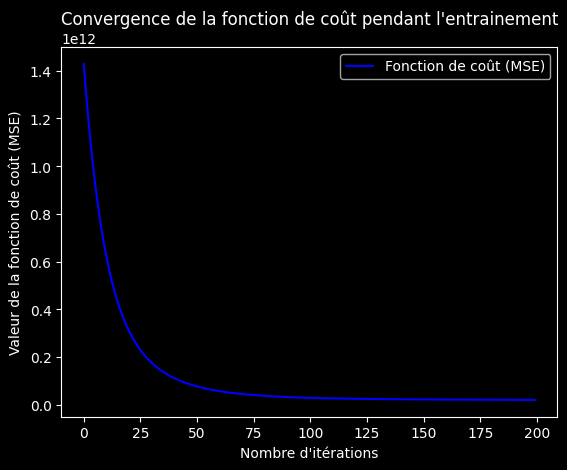

In [105]:
# Visualisation de la courbe d'apprentissage : Evolution de la fonction de coût au fil des itérations
plt.plot(range(200), cost_history, label='Fonction de coût (MSE)', color='b')

# Ajouter des étiquettes et un titre
plt.xlabel('Nombre d\'itérations')  # Légende pour l'axe des x
plt.ylabel('Valeur de la fonction de coût (MSE)')  # Légende pour l'axe des y
plt.title('Convergence de la fonction de coût pendant l\'entrainement')  # Titre du graphique

# Ajouter une légende pour plus de clarté
plt.legend()

# Affichage du graphique
plt.show()


## 7. Evaluation Finale

Dans le cadre de l'évaluation de la performance du modèle, l'une des métriques les plus couramment utilisées est le **coefficient de détermination** $ R^2 $. Ce coefficient mesure la proportion de la variance totale des données qui est expliquée par le modèle. Plus précisément, il compare la somme des carrés des erreurs du modèle à la somme des carrés totaux par rapport à la moyenne des valeurs réelles.

Le coefficient de détermination \( R^2 \) est défini par la formule suivante :

$$
R^2 = 1 - \frac{\sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{m} (y^{(i)} - \bar{y})^2}
$$

Où :
- $ y^{(i)} $ représente la valeur réelle de l'exemple $ i $,
- $ \hat{y}^{(i)} $ est la prédiction du modèle pour cet exemple,
- $ \bar{y} $ est la moyenne des valeurs réelles des exemples.

Interprétation du coefficient $ R^2 $ :
- **$ R^2 = 1 $** : Cela signifie que le modèle explique parfaitement la variance des données, et toutes les prédictions sont égales aux valeurs réelles.
- **$ R^2 = 0 $** : Le modèle ne fait pas mieux qu'une prédiction qui serait simplement la moyenne des valeurs réelles. Il n'explique aucune variance.
- **$ R^2 < 0 $** : Cela indique que le modèle est moins performant qu'un modèle qui prédit constamment la moyenne des valeurs réelles. C'est un indicateur que le modèle ne correspond pas du tout aux données.

Fonction de calcul du coefficient $ R^2 $ :

La fonction `coef_determination` permet de calculer ce coefficient à partir des valeurs réelles et des prédictions faites par le modèle. Elle suit les étapes suivantes :
1. **Calcul de la somme des carrés des erreurs** $ u $, qui est la différence entre les valeurs réelles et les prédictions.
2. **Calcul de la somme des carrés totaux** $ v $, qui est la variance des valeurs réelles par rapport à leur moyenne.
3. **Calcul du $ R^2 $** à l'aide de la formule $ R^2 = 1 - \frac{u}{v} $.

Coefficient de détermination (R^2) : 0.9784


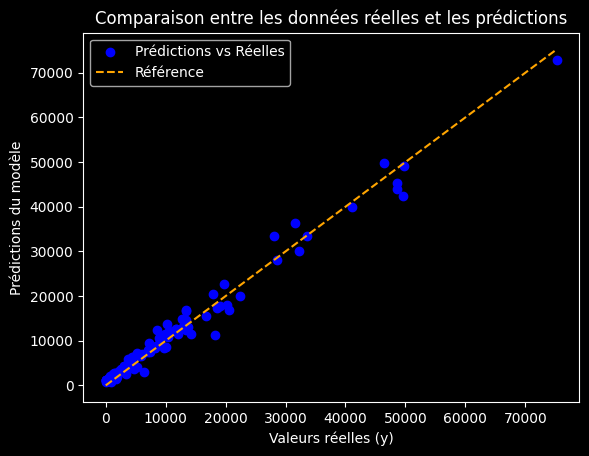

In [106]:
# Calcul du coefficient de détermination (R^2)
def coef_determination(y, pred):
    """
    Calcule le coefficient de détermination R^2 pour évaluer la qualité du modèle.
    
    Args:
        y (numpy.ndarray): Valeurs réelles de la variable cible
        pred (numpy.ndarray): Prédictions du modèle
    
    Returns:
        float: Coefficient de détermination (R^2)
    """
    u = ((y - pred)**2).sum()  # Somme des erreurs au carré
    v = ((y - y.mean())**2).sum()  # Somme des carrés des différences par rapport à la moyenne des y
    return 1 - u/v  # Calcul du R^2

# Affichage du coefficient de détermination
r2_score = coef_determination(y, pred)
print(f"Coefficient de détermination (R^2) : {r2_score:.4f}")

# Visualisation 1 : Comparaison entre les données réelles et les prédictions
plt.scatter(y, pred, color='blue', label='Prédictions vs Réelles')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', linestyle='--', label='Référence')
plt.xlabel('Valeurs réelles (y)')
plt.ylabel('Prédictions du modèle')
plt.title('Comparaison entre les données réelles et les prédictions')
plt.legend()
plt.show()


# Crédit

Ce travail a été réalisé par **BAZIZ Badis** (Badis213 sur GitHub). L'ensemble des codes, analyses et visualisations présents dans ce notebook ont été développés et effectués de manière indépendante. Vous pouvez retrouver mon travail sur [GitHub - Badis213](https://github.com/Badis213).

Je tiens à souligner que l'algorithme de régression multiple et la méthode de descente de gradient utilisés dans ce notebook sont des implémentations personnelles, construites pour démontrer l'application de ces techniques sur des données multivariées.



### Conclusion

Ce travail a permis d'implémenter et d'évaluer un modèle de régression multiple utilisant la méthode de la descente de gradient pour l'ajustement des paramètres du modèle. Les résultats obtenus montrent que le modèle est capable de prédire la variable cible avec une précision satisfaisante, comme en témoigne le coefficient de détermination \( R^2 \) calculé.

Cependant, certaines améliorations peuvent être envisagées pour perfectionner le modèle. Une exploration plus approfondie des méthodes de régularisation, telles que la régression Ridge ou Lasso, pourrait renforcer la robustesse du modèle et limiter les risques de sur-apprentissage dans des contextes où les données pourraient être bruitées ou sur-paramétrées.

Dans l'ensemble, ce projet met en lumière l'efficacité de la régression multiple et de la descente de gradient dans le contexte des modèles prédictifs sur des données multivariées.

### Application Pratique

Les méthodes utilisées dans ce travail, telles que la régression multiple et la descente de gradient, sont couramment appliquées dans des secteurs comme la finance, le marketing et l'ingénierie. Ce travail met en lumière l'utilisation d'un modèle **quadratique**, permettant de modéliser des relations non linéaires entre les variables d'entrée et la variable cible.

Bien que les données ici soient abstraites, ce type de modèle est particulièrement utile pour des situations où les relations entre les variables suivent une courbe plutôt qu'une ligne droite. Par exemple :

- **Finance :** Prédire le prix d'un bien immobilier en fonction de taux d'intérêt, où une variation importante peut avoir un impact disproportionné.
- **Marketing :** Estimer l'impact d'une dépense publicitaire, où l'effet peut croître puis diminuer au-delà d'un certain seuil.
  
Le modèle quadratique permet de capturer des **relations plus complexes**. Cependant, pour des données avec des relations très non linéaires ou des interactions multiples, des techniques comme les **réseaux de neurones** ou les **arbres de décision** peuvent offrir de meilleures performances.

En résumé, ce travail montre l'efficacité de la régression multiple et de la descente de gradient pour des relations non linéaires modérées, tout en ouvrant la voie à des approches plus complexes pour des problèmes plus difficiles.
